In [1]:
import spacy
import pandas as pd
import time
from spacy.matcher import DependencyMatcher
from tqdm import tqdm
import numpy as np

In [2]:
nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load("en_core_web_lg")

In [3]:
matcher_sm = DependencyMatcher(nlp_sm.vocab)
matcher_lg = DependencyMatcher(nlp_lg.vocab)

In [4]:
pattern = [
    {
        "RIGHT_ID": "verb",
        "RIGHT_ATTRS": {"POS": "VERB"}
    },
    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "subject",
        "RIGHT_ATTRS": {"DEP": "nsubj", "POS":{"IN": ["NOUN", "PROPN"]}},
    },
    {
        "LEFT_ID": "verb",
        "REL_OP": ">",
        "RIGHT_ID": "object",
        "RIGHT_ATTRS": {"DEP": "dobj"},
    },
]

matcher_sm.add('verb', [pattern])
matcher_lg.add('verb', [pattern])

In [5]:
def get_triplet(nlp, matcher, sentence):
    doc = nlp(sentence)
    matches = matcher(doc)
    
    triplets = []
    for match_id, token_ids in matches:
        subj, verb, obj = (doc[token_ids[1]], doc[token_ids[0]], doc[token_ids[2]])
        subj, verb, obj = (subj.pos_ if subj.pos_ == 'PROPN' else subj.text, verb.text, obj.pos_ if obj.pos_ == 'PROPN' else obj.text)

        triplets.append((subj, verb, obj)) 
    return triplets

In [6]:
with open('1g-word-1m-benchmark-r13output/training-monolingual.tokenized.shuffled/news.en-00001-of-00100') as sentences:
    sentences = sentences.read().split('\n')
    sentences.remove('')

In [7]:
array = np.array([[0, 0, [], 0, []]], dtype=object)
index = -1

In [22]:
loader = tqdm(sentences[:75000])
for sentence in loader:
    index += 1
    sm_triplets = get_triplet(nlp_sm, matcher_sm, sentence)
    lg_triplets = get_triplet(nlp_lg, matcher_lg, sentence)
    
    
    array = np.append(array,
              [[
                  index+1, 
                  array[index, 1] + len(sm_triplets),
                  sm_triplets,
                  array[index, 3] + len(lg_triplets),
                  lg_triplets
              ]], axis=0)
    

100%|██████████| 25000/25000 [13:31<00:00, 30.80it/s]


In [9]:
from matplotlib import pyplot as plt

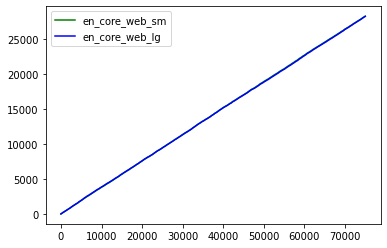

In [55]:
plt.plot(array[:, 0], array[:, 1], color='green', label='en_core_web_sm')
plt.plot(array[:, 0], array[:, 3], color='blue', label='en_core_web_lg')
plt.legend()
plt.show()

In [9]:
n = 5000
array[n, 1],array[n, 3] 

(1911, 1937)

In [10]:
n = 20000
array[n, 1],array[n, 3] 

(7562, 7578)

In [7]:
n = 40000
array[n, 1],array[n, 3] 

(15185, 15164)

In [8]:
n = 60000
array[n, 1],array[n, 3] 

(22668, 22596)

In [59]:
array[n, 1]/n, array[n, 3]/n

(0.3781, 0.3789)

In [7]:
array = np.load('array.npy', allow_pickle=True)

In [8]:
array[:, 2]

array([list([]),
       list([('PROPN', 'advised', 'systems'), ('mildness', 'meant', 'schools')]),
       list([('PROPN', 'invited', 'PROPN')]), ...,
       list([('renaissance', 'continues', 'apace')]),
       list([('package', 'includes', 'loan')]), list([])], dtype=object)

In [19]:
triplet_1 = []
for line in array[:, 2]:
    for triplet in line:
        triplet_1.append(list(triplet))

triplet_2 = []
for line in array[:, 4]:
    for triplet in line:
        triplet_2.append(list(triplet))

In [24]:
triplet_1

[['PROPN', 'advised', 'systems'],
 ['mildness', 'meant', 'schools'],
 ['PROPN', 'invited', 'PROPN'],
 ['hunters', 'perfected', 'that'],
 ['candidate', 'wins', 'majority'],
 ['Authorities', 'served', 'warrants'],
 ['PROPN', 'join', 'PROPN'],
 ['team', 'reviewing', 'entitlement'],
 ['PROPN', 'recommends', 'thing'],
 ['PROPN', 'slammed', 'PROPN'],
 ['PROPN', 'cites', 'instances'],
 ['executive', 'sued', 'brewer'],
 ['PROPN', 'sells', 'buildings'],
 ['father', 'inherited', 'company'],
 ['ladies', 'had', 'husbands'],
 ['panels', 'use', 'criteria'],
 ['deal', 'generate', 'revenue'],
 ['vice', 'assures', 'president'],
 ['-', 'assures', 'president'],
 ['PROPN', 'issued', 'statement'],
 ['cent', 'owns', 'cent'],
 ['PROPN', 'ran', 'schemes'],
 ['officials', 'coordinated', 'assistance'],
 ['vacationers', 'visit', 'parks'],
 ['PROPN', 'presented', 'fossil'],
 ['t', 'hear', 'PROPN'],
 ['PROPN', 'scheduled', 'call'],
 ['Investors', 'access', 'replay'],
 ['woman', 'have', 'sex'],
 ['panel', 'investig

In [23]:
triplet_2

28211

In [58]:
dic_1 = {}
for subj, verb, obj in triplet_1:
    if obj not in dic_1:
        dic_1[obj] = []
    dic_1[obj].append((subj, verb))

In [91]:
dic_1['women']

[('publicity', 'prevent'),
 ('PROPN', 'counts'),
 ('t', 'have'),
 ('Officers', 'asked'),
 ('guidelines', 'advise'),
 ('Researchers', 'compared'),
 ('PROPN', 'paints'),
 ('insurers', 'reject'),
 ('PROPN', 'threatened'),
 ('judge', 'denounced'),
 ('PROPN', 'lured'),
 ('fire', 'killed'),
 ('PROPN', 'appointed'),
 ('study', 'found'),
 ('Gunmen', 'killed'),
 ('research', 'claims'),
 ('caller', 'ask'),
 ('PROPN', 'analyzed'),
 ('women', 'joined'),
 ('survey', 'shows'),
 ('study', 'included'),
 ('deaths', 'included'),
 ('experience', 'inspired')]

In [86]:
counter = {}
for subj, verb in dic_1['black']:
    if verb not in counter:
        counter[verb] = 0
    counter[verb] += 1
counter

{'interpreted': 1, 'had': 1}

In [57]:
counter = {}
for verb, obj in dic_1['police']:
    if verb not in counter:
        counter[verb] = 0
    counter[verb] += 1
print(counter)


counter = {}
for verb, obj in dic_1['woman']:
    if obj not in counter:
        counter[obj] = 0
    counter[obj] += 1
print(counter)

{'ensure': 1, 'aren': 1, 'used': 4, 'received': 2, 'stopped': 2, 'alerted': 1, 'found': 3, 'blocked': 3, 'hold': 1, 'continue': 1, 'raided': 3, 'investigating': 1, 'kept': 2, 'issued': 1, 'carrying': 1, 'handle': 1, 'investigated': 1, 'searched': 4, 'heightened': 1, 'pioneering': 1, 'urged': 1, 'asked': 1, 'questioned': 1, 'have': 3, 'search': 1, 'studied': 1, 'cleared': 1, 'described': 1, 'detained': 1, 'make': 1, 'identify': 1, 'held': 1, 'begun': 2, 'subdued': 2, 'tracking': 1, 'fired': 2, 'drew': 1, 'enter': 1, 'blocking': 1, 'made': 1, 'blamed': 1, 'collected': 2, 'harassed': 1, 'told': 2, 'interviewing': 1, 'block': 1, 'seized': 2, 'set': 1, 'call': 1, 'uncovered': 1, 'picked': 1, 'taken': 1, 'broke': 1, 'arrested': 3, 'discovered': 1, 'beating': 1, 'shut': 1, 'reviewing': 1, 'recovered': 1, 'control': 1, 'tracked': 1, 'pursuing': 1, 'said': 1, 'process': 1, 'manned': 1, 'turned': 1, 'stormed': 1, 'ordered': 1, 'took': 1, 'investigate': 1, 'suspect': 1, 'confiscated': 1, 'followi